In [11]:
from sklearn.datasets import load_digits
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV
digits = load_digits()
x = digits.data
y = digits.target
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
classifier = MLPClassifier()
from sklearn.grid_search import GridSearchCV
parameters={
'learning_rate':["constant", "invscaling", "adaptive"],
'learning_rate_init':[0.01,0.1,0.5],
'hidden_layer_sizes':[(10,8,6), (10,10,5), (8,3)],
'alpha': [0.0001, 0.001,0.01,0.1],#10.0 ** -np.arange(1, 7)],
'activation':["logistic", "relu", "tanh"]
}
MlpClf = GridSearchCV(classifier,param_grid=parameters)
y_score = MlpClf.fit(X_train, y_train).predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc[1]

C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Arun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

0.89230769230769236

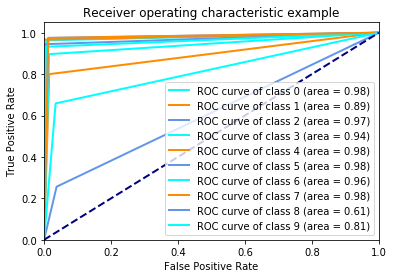

In [12]:
import matplotlib.pyplot as plt
from itertools import cycle
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.metrics import classification_report
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print(classification_report(y_test, y_score))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.93      0.96      0.95        27
          1       0.85      0.80      0.82        35
          2       0.97      0.94      0.96        36
          3       0.84      0.90      0.87        29
          4       1.00      0.97      0.98        30
          5       0.91      0.97      0.94        40
          6       0.98      0.93      0.95        44
          7       0.90      0.97      0.94        39
          8       0.45      0.26      0.33        39
          9       0.71      0.66      0.68        41

avg / total       0.85      0.83      0.83       360




In [14]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_score.argmax(axis=1))
print(matrix)

[[26  0  0  0  0  1  0  0  0  0]
 [ 8 27  0  0  0  0  0  0  0  0]
 [ 1  2 33  0  0  0  0  0  0  0]
 [ 2  0  0 26  0  0  0  0  0  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 3  1  0  0  0  0 40  0  0  0]
 [ 1  0  0  0  0  0  1 37  0  0]
 [20  2  1  2  0  1  0  0 10  3]
 [ 8  0  0  3  0  2  0  1 12 15]]


In [15]:
score = MlpClf.score(X_test, y_test)
print(score)

0.761111111111


In [16]:
MlpClf.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (10, 10, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01}

In [17]:
MlpClf.best_estimator_

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 5), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
MlpClf.best_score_

0.7230340988169798